# Equipo: Hercules Poirot

## Componentes
- Eva Mañans
- Mariano Puchades
- Antonio Herrera
- Justo Barco

# Diagrama E/R
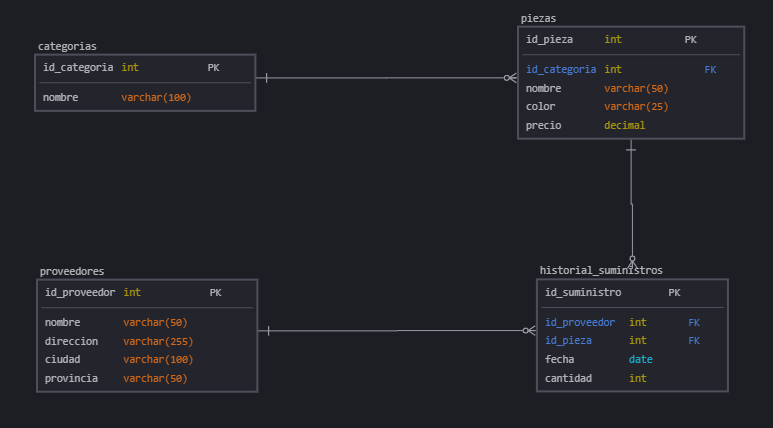

In [23]:
import sqlite3
connetion = sqlite3.connect("./Data/lego_bd.db")
cursor = connetion.cursor()

In [ ]:
# CREACIÓN DE LA BASE DE DATOS 
query_create = '''
-- **************** `proveedores` **********************
CREATE TABLE `proveedores`
(
 `id_proveedor` int NOT NULL ,
 `nombre`       varchar(50) NOT NULL ,
 `direccion`    varchar(255) NOT NULL ,
 `ciudad`       varchar(100) NOT NULL ,
 `provincia`    varchar(50) NOT NULL ,

PRIMARY KEY (`id_proveedor`)
);

-- **************** `categorias` **********************
CREATE TABLE `categorias`
(
 `id_categoria` int NOT NULL ,
 `nombre`       varchar(100) NOT NULL ,

PRIMARY KEY (`id_categoria`)
);

-- **************** `piezas` **********************
CREATE TABLE `piezas`
(
 `id_pieza`     int NOT NULL ,
 `id_categoria` int NOT NULL ,
 `nombre`       varchar(50) NOT NULL ,
 `color`        varchar(25) NOT NULL ,
 `precio`       decimal NOT NULL ,

PRIMARY KEY (`id_pieza`),
FOREIGN KEY (`id_categoria`) REFERENCES `categorias` (`id_categoria`)
);

-- ************************************** `historial_suministros`
CREATE TABLE `historial_suministros`
(
 `id_suministro`  NOT NULL ,
 `id_proveedor`  int NOT NULL ,
 `id_pieza`      int NOT NULL ,
 `fecha`         date NOT NULL ,
 `cantidad`      int NOT NULL ,

PRIMARY KEY (`id_suministro`),
FOREIGN KEY (`id_proveedor`) REFERENCES `proveedores` (`id_proveedor`),
FOREIGN KEY (`id_pieza`) REFERENCES `piezas` (`id_pieza`)
);
'''

counter = 0
for line in query_create.split(";"):
    if len(line.strip()) > 0:
        #print("Creando tabla...\n",line)
        cursor.execute(line)
        counter += 1

connetion.commit()
print(f"Se han creado {counter} tablas")


Se han creado 4 tablas


In [32]:
query_insert = '''

DELETE FROM `historial_suministros`;
DELETE FROM `piezas`;
DELETE FROM 'categorias';
DELETE FROM 'proveedores';

-- **************** `proveedores` **********************
INSERT INTO 'proveedores' ('id_proveedor','nombre','direccion','ciudad','provincia') VALUES('1','Billund ','Mezquita Cordoba, 36','Bellvitge','Barcelona');
INSERT INTO 'proveedores' ('id_proveedor','nombre','direccion','ciudad','provincia') VALUES('2','Nyíregyháza ','Los alcazares, 28','Barbastro','Huesca');
INSERT INTO 'proveedores' ('id_proveedor','nombre','direccion','ciudad','provincia') VALUES('3','Monterrey','Camino de los andantes, 32','Antequera','Malaga');

-- **************** `categorias` **********************
INSERT INTO 'categorias' ('id_categoria','nombre') VALUES('1','1x1');
INSERT INTO 'categorias' ('id_categoria','nombre') VALUES('2','2x2');
INSERT INTO 'categorias' ('id_categoria','nombre') VALUES('3','2x4');
INSERT INTO 'categorias' ('id_categoria','nombre') VALUES('4','2x6');

-- **************** `piezas` **********************
INSERT INTO 'piezas' ('id_pieza','id_categoria','nombre','color','precio') VALUES('1','1','placa','rojo','0,025');
INSERT INTO 'piezas' ('id_pieza','id_categoria','nombre','color','precio') VALUES('2','2','placa','verde','0,05');
INSERT INTO 'piezas' ('id_pieza','id_categoria','nombre','color','precio') VALUES('3','3','placa','blanco','0,1');
INSERT INTO 'piezas' ('id_pieza','id_categoria','nombre','color','precio') VALUES('4','4','ladrillo','amarillo','0,25');
INSERT INTO 'piezas' ('id_pieza','id_categoria','nombre','color','precio') VALUES('5','1','ladrillo','negro','0,5');
INSERT INTO 'piezas' ('id_pieza','id_categoria','nombre','color','precio') VALUES('6','2','ladrillo','azul','1');

-- **************** `historial_suministros` **********************
INSERT INTO 'historial_suministros' ('id_suministro','id_proveedor','id_pieza','fecha','cantidad') VALUES(1,'1','1','2024-12-04','400');
INSERT INTO 'historial_suministros' ('id_suministro','id_proveedor','id_pieza','fecha','cantidad') VALUES('2','2','1','2024-12-04','200');
INSERT INTO 'historial_suministros' ('id_suministro','id_proveedor','id_pieza','fecha','cantidad') VALUES('3','3','2','2024-12-04','300');
INSERT INTO 'historial_suministros' ('id_suministro','id_proveedor','id_pieza','fecha','cantidad') VALUES('4','1','3','2024-12-04','1200');
INSERT INTO 'historial_suministros' ('id_suministro','id_proveedor','id_pieza','fecha','cantidad') VALUES('5','2','4','2024-12-04','100');
INSERT INTO 'historial_suministros' ('id_suministro','id_proveedor','id_pieza','fecha','cantidad') VALUES('6','3','5','2024-12-04','50');


'''

counter = 0
for line in query_insert.split("\n"):
    if len(line.strip()) > 0 and not line.startswith("--"):
        print("línea:", line)
        counter += 1
        cursor.execute(line)

connetion.commit()
print(f"Se han ejecutado {counter} querys")

línea: DELETE FROM `historial_suministros`;
línea: DELETE FROM `piezas`;
línea: DELETE FROM 'categorias';
línea: DELETE FROM 'proveedores';
línea: INSERT INTO 'proveedores' ('id_proveedor','nombre','direccion','ciudad','provincia') VALUES('1','Billund ','Mezquita Cordoba, 36','Bellvitge','Barcelona');
línea: INSERT INTO 'proveedores' ('id_proveedor','nombre','direccion','ciudad','provincia') VALUES('2','Nyíregyháza ','Los alcazares, 28','Barbastro','Huesca');
línea: INSERT INTO 'proveedores' ('id_proveedor','nombre','direccion','ciudad','provincia') VALUES('3','Monterrey','Camino de los andantes, 32','Antequera','Malaga');
línea: INSERT INTO 'categorias' ('id_categoria','nombre') VALUES('1','1x1');
línea: INSERT INTO 'categorias' ('id_categoria','nombre') VALUES('2','2x2');
línea: INSERT INTO 'categorias' ('id_categoria','nombre') VALUES('3','2x4');
línea: INSERT INTO 'categorias' ('id_categoria','nombre') VALUES('4','2x6');
línea: INSERT INTO 'piezas' ('id_pieza','id_categoria','nombr

In [33]:
cursor.close()
connetion.close()